In [129]:
import pandas as pd
import numpy as np
import urllib.request as rq
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

import time
import itertools
import random

from IPython.display import Video
from matplotlib.animation import FuncAnimation, PillowWriter
from selenium import webdriver
from shutil import copyfile
from bs4 import BeautifulSoup as bs
from shapely import geometry

In [3]:
# load neighborhood data
df_nhood = gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2020/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")

In [5]:
df_nhood.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,geometry
0,1,3,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),3.532181e+07,28919.561151,"POLYGON ((-73.93214 40.72817, -73.93238 40.728..."
1,2,3,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),2.885285e+07,28134.082604,"POLYGON ((-73.95814 40.72441, -73.95772 40.724..."
2,3,3,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),1.520896e+07,18250.280091,"POLYGON ((-73.95024 40.70548, -73.94984 40.705..."
3,4,3,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),5.226741e+07,43184.800375,"POLYGON ((-73.92406 40.71412, -73.92404 40.714..."
4,5,3,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,9.982023e+06,14312.192285,"POLYGON ((-73.99237 40.6897, -73.99436 40.6902..."


In [112]:
# function to get epsg data
i = 1
def get_page_text(i):
    page = requests.get(f"https://spatialreference.org/ref/epsg/?page={i}")
    if page.status_code == 200:
            return page.text
    return None

def get_epsg(i, driver):
    driver.get(f"https://spatialreference.org/ref/epsg/?page={i}")
    time.sleep(7)
    page_contents = driver.page_source
    #page_contents = get_page_text(i)
    soup = bs(page_contents, 'html.parser')
    outer_container = soup.find('div', class_='inner-flexbox')
    epsg_values = outer_container.find_all('a')
    epsg_values = [x.get_text(strip=True) for x in epsg_values ]
    epsg_values = [x.replace('EPSG:', '') for x in epsg_values if 'EPSG' in x]
    if len(epsg_values)==0:
        return None
    print(epsg_values)
    #authors = soup.find_all('small', class_='author')
    return epsg_values


driver = webdriver.Chrome()
epsg_values = [get_epsg(i, driver) for i in range(1,160)]
driver.quit()

['32358', '32359', '32360', '32401', '32402', '32403', '32404', '32405', '32406', '32407', '32408', '32409', '32410', '32411', '32412', '32413', '32414', '32415', '32416', '32417', '32418', '32419', '32420', '32421', '32422', '32423', '32424', '32425', '32426', '32427', '32428', '32429', '32430', '32431', '32432', '32433', '32434', '32435', '32436', '32437', '32438', '32439', '32440', '32441', '32442', '32443', '32444', '32445', '32446', '32447']
['32448', '32449', '32450', '32451', '32452', '32453', '32454', '32455', '32456', '32457', '32458', '32459', '32460', '32501', '32502', '32503', '32504', '32505', '32506', '32507', '32508', '32509', '32510', '32511', '32512', '32513', '32514', '32515', '32516', '32517', '32518', '32519', '32520', '32521', '32522', '32523', '32524', '32525', '32526', '32527', '32528', '32529', '32530', '32531', '32532', '32533', '32534', '32535', '32536', '32537']
['32538', '32539', '32540', '32541', '32542', '32543', '32544', '32545', '32546', '32547', '32548'

In [116]:
epsg_values = [x for x in epsg_values if x is not None]
epsg_values_flat = list(itertools.chain.from_iterable(epsg_values))
#epsg_values_flat = epsg_values_flat + epsg_values_flat_orig
frame_val = len(epsg_values_flat)
frame_val

In [99]:
# epsg_values_flat_orig = epsg_values_flat

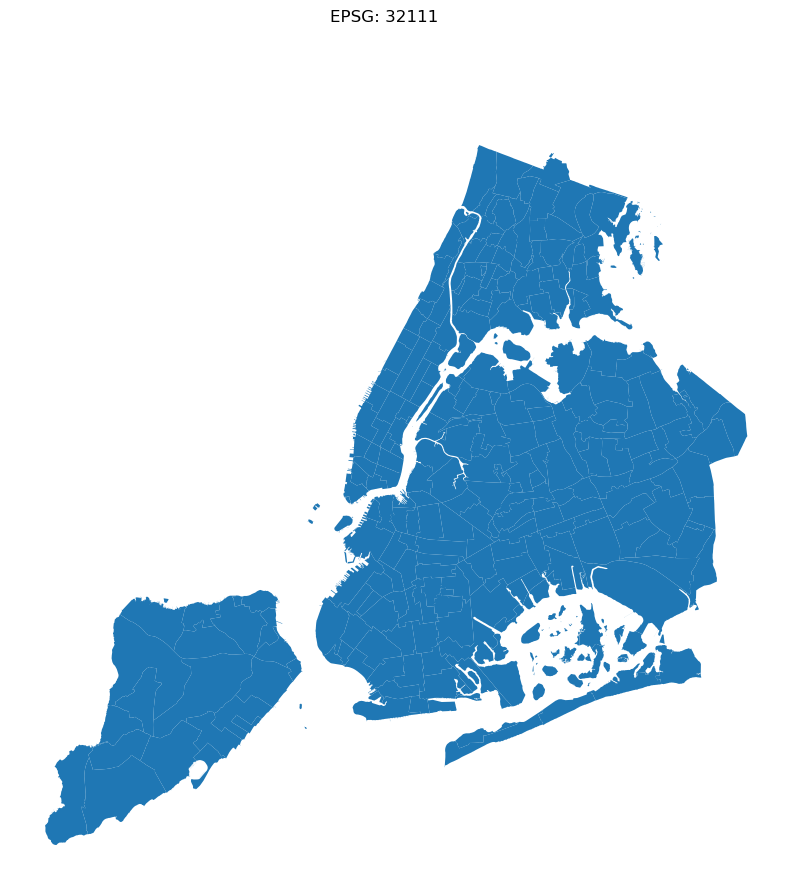

In [136]:
fig, ax = plt.subplots(figsize=(10,10))
title = fig.suptitle('')
ax.set_axis_off()
epsg_values_flat_sampled = random.sample(epsg_values_flat, k=1000)
def update_fig(i):
    crs = epsg_values_flat_sampled[i]
    ax.clear()
    try:
        df_nhood.to_crs(crs).plot(ax=ax)
        title.set_text(f'EPSG: {crs}')
        ax.set_axis_off()
    except:
        df_nhood.to_crs(2263).plot(ax=ax)
        title.set_text(f'EPSG: {crs}')
        ax.set_axis_off()
    # ax.set_title(f'EPSG: {crs}')
anim = FuncAnimation(fig, update_fig, repeat=False, interval=1, frames=1000)

In [137]:
# Save the animation as a GIF
writer = PillowWriter(fps=10)
anim.save('different_projections.gif', writer=writer)